In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Using a link of the dataset from another github user, limited to 25 mb files on a free account.
url = 'https://raw.githubusercontent.com/peterle93/Toronto-Airbnb-Analysis/master/listings_sep_09_2020.csv'
data = pd.read_csv(url)

In [7]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200909043044,2020-09-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.11
1,8077,https://www.airbnb.com/rooms/8077,20200909043044,2020-09-10,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,10.0,10.0,10.0,NaN,t,2,1,1,0,1.25
2,12604,https://www.airbnb.com/rooms/12604,20200909043044,2020-09-09,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlou...,NaN,https://a0.muscache.com/pictures/5282025/91fca...,48239,https://www.airbnb.com/users/show/48239,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20200909043044,2020-09-10,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,10.0,9.0,10.0,NaN,t,2,0,2,0,1.73
4,26654,https://www.airbnb.com/rooms/26654,20200909043044,2020-09-09,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,...,9.0,10.0,9.0,NaN,t,5,5,0,0,0.34


In [8]:
# dataframe layout
data.shape

(19343, 74)

In [9]:
# basic info on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19343 entries, 0 to 19342
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19343 non-null  int64  
 1   listing_url                                   19343 non-null  object 
 2   scrape_id                                     19343 non-null  int64  
 3   last_scraped                                  19343 non-null  object 
 4   name                                          19342 non-null  object 
 5   description                                   18623 non-null  object 
 6   neighborhood_overview                         12364 non-null  object 
 7   picture_url                                   19343 non-null  object 
 8   host_id                                       19343 non-null  int64  
 9   host_url                                      19343 non-null 

In [16]:
# Better view of null values
null = data.isnull().sum().to_frame()
for index, row in null.iterrows():
    print(index, row[0])

id 0
listing_url 0
scrape_id 0
last_scraped 0
name 1
description 720
neighborhood_overview 6979
picture_url 0
host_id 0
host_url 0
host_name 4
host_since 4
host_location 14
host_about 8385
host_response_time 7529
host_response_rate 7529
host_acceptance_rate 5671
host_is_superhost 4
host_thumbnail_url 4
host_picture_url 4
host_neighbourhood 3791
host_listings_count 4
host_total_listings_count 4
host_verifications 0
host_has_profile_pic 4
host_identity_verified 4
neighbourhood 6979
neighbourhood_cleansed 0
neighbourhood_group_cleansed 19343
latitude 0
longitude 0
property_type 0
room_type 0
accommodates 0
bathrooms 19343
bathrooms_text 13
bedrooms 1429
beds 196
amenities 0
price 0
minimum_nights 0
maximum_nights 0
minimum_minimum_nights 0
maximum_minimum_nights 0
minimum_maximum_nights 0
maximum_maximum_nights 0
minimum_nights_avg_ntm 0
maximum_nights_avg_ntm 0
calendar_updated 19343
has_availability 0
availability_30 0
availability_60 0
availability_90 0
availability_365 0
calendar_last

In [28]:
#Price and reviews were selected as target candidates
pr = len(pd.unique(data['price']))
re = len(pd.unique(data['review_scores_rating']))
print(pr ,"unique prices,", re , "unique ratings")


936 unique prices, 51 unique ratings


In [32]:
data['price'].unique()

array(['$469.00', '$99.00', '$66.00', '$70.00', '$135.00', '$54.00',
       '$53.00', '$132.00', '$100.00', '$75.00', '$115.00', '$93.00',
       '$106.00', '$120.00', '$50.00', '$86.00', '$141.00', '$65.00',
       '$85.00', '$79.00', '$150.00', '$149.00', '$108.00', '$125.00',
       '$67.00', '$202.00', '$175.00', '$160.00', '$105.00', '$60.00',
       '$61.00', '$180.00', '$80.00', '$370.00', '$199.00', '$379.00',
       '$325.00', '$210.00', '$122.00', '$95.00', '$138.00', '$126.00',
       '$143.00', '$176.00', '$266.00', '$88.00', '$142.00', '$73.00',
       '$64.00', '$90.00', '$52.00', '$260.00', '$45.00', '$185.00',
       '$500.00', '$140.00', '$232.00', '$343.00', '$650.00', '$139.00',
       '$182.00', '$350.00', '$83.00', '$198.00', '$155.00', '$225.00',
       '$145.00', '$58.00', '$57.00', '$200.00', '$30.00', '$240.00',
       '$55.00', '$349.00', '$189.00', '$151.00', '$78.00', '$229.00',
       '$226.00', '$264.00', '$107.00', '$129.00', '$130.00', '$71.00',
       '

In [45]:
#Price is saved as object, remove currency labels and convert to float.
data['price'] = data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['price']

<AxesSubplot:>

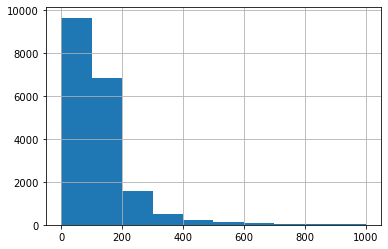

In [53]:
#Hist for price values, values in 1000 are for all values 1000+
data['price'].hist(bins=[0,100,200,300,400,500,600,700,800,900,1000])

In [57]:
#Percentage of values above 400 price point
c = len([i for i in data['price'] if i > 400])
c/19343*100

3.39140774440366

<AxesSubplot:>

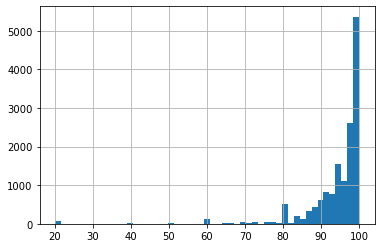

In [30]:
#Hist for review ratings
data['review_scores_rating'].hist(bins=51)

In [64]:
#Percentage of reviews above an 8.0
c = len([i for i in data['review_scores_rating'] if i > 8])
c/19343*100

77.59913146874838

In [66]:
# Drop candidates
# URL columns, scrape_id (1 value), host info/desc (mostly useless), uncleansed columns, etc.

# Full drop or impute nans? (by feature)


In [ ]:
# data correlation after cleansing
# corr = data.corr()['$$$'].abs().sort_values(ascending = False)

In [ ]:
# Continue cleaning data : drop unimportant columns, imputing nan/outliers, rescale data if needed, dummy columns for cat data.
# EDA looking for important features